# [作業目標]
- 利用範例的創建方式, 創建一組資料, 並練習如何取出最大值

# [作業重點]
- 練習創立 DataFrame (In[2])
- 如何取出口數最多的國家 (In[3], Out[3])

## 練習時間
在小量的資料上，我們用眼睛就可以看得出來程式碼是否有跑出我們理想中的結果

請嘗試想像一個你需要的資料結構 (裡面的值可以是隨機的)，然後用上述的方法把它變成 pandas DataFrame

#### Ex: 想像一個 dataframe 有兩個欄位，一個是國家，一個是人口，求人口數最多的國家

### Hints: [隨機產生數值](https://blog.csdn.net/christianashannon/article/details/78867204)

In [208]:
import pandas as pd
import numpy as np

In [221]:
country = ["Taiwan","United States","Thailand"]
population = np.random.randint(1,10,size=3) * (10**np.random.randint(6,9,size=3))
data = {'國家': country,
        '人口': population}
data = pd.DataFrame(data)
print(data)

              國家         人口
0         Taiwan   20000000
1  United States  900000000
2       Thailand   30000000


In [231]:
population_max_country = data['國家'][data['人口'].idxmax()]
population_min_country = data['國家'][data['人口'].idxmin()]
population_max=data['人口'].max()
population_min=data['人口'].min()

In [232]:
print('人口最多的國家是：',population_max_country,'總共有',str(population_max),'人')
print('人口最少的國家是：',population_min_country,'總共有',str(population_min),'人')

人口最多的國家是： United States 總共有 900000000 人
人口最少的國家是： Taiwan 總共有 20000000 人


## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [238]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"

In [254]:
import requests
response = requests.get(target_url)
print(response.status_code)
data = response.text
print(type(response))
print(type(data))
# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

200
<class 'requests.models.Response'>
<class 'str'>
784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [255]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = "\n"
data = data.split(split_tag)
print(type(data))
data[1]

<class 'list'>


'n00015388_238\thttp://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg'

In [256]:
data[1].split('\t')[0]

'n00015388_238'

## 將 txt 轉成 pandas dataframe

In [257]:
import pandas as pd
def split_data(data):
    name=[]
    url=[]
    for i in data:
        name.append(i.split('\t')[0])
        try:
            url.append(i.split('\t')[1])
        except:
            url.append("")
    dict_url={'name':name,'url':url}
    
    return dict_url

In [258]:
data=split_data(data)
df = pd.DataFrame(data)

df.head()

,name,url
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


'http://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

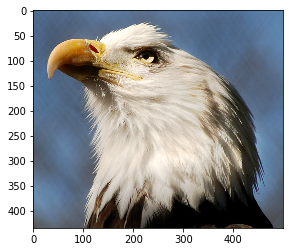

In [267]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.iloc[0,1]

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

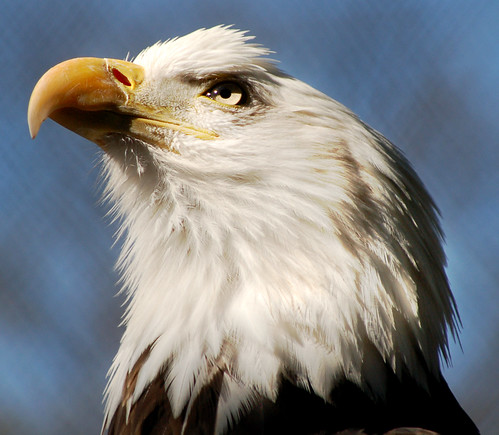

In [290]:
Image.open(BytesIO(requests.get(df['url'][0:5][0]).content))

In [293]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list=[]
    for url in url_list:
        response = requests.get(url)
        try:
            img=Image.open(BytesIO(response.content))
        except :
            pass
        else:
            img_list.append(img)
    return img_list

Total images that we got: 4 


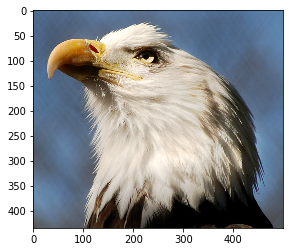

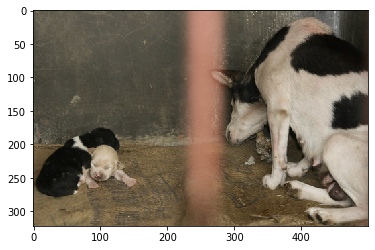

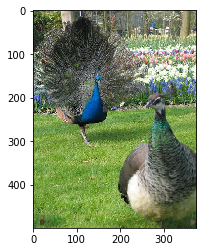

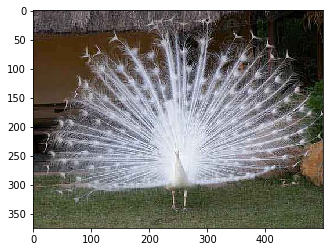

In [294]:
result = img2arr_fromURLs(df['url'][0:5])
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()